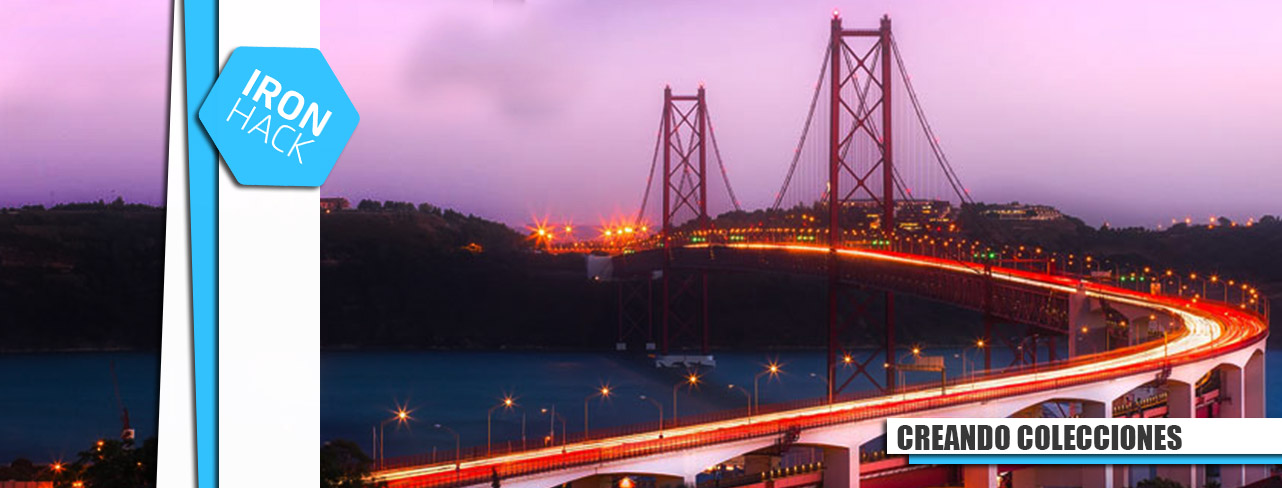

In [448]:
import sys
sys.path.append("../")

In [492]:
import src.tratamiento_datos as td

In [14]:
from pymongo import MongoClient
client = MongoClient("localhost:27017")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [15]:
db = client.get_database("ironhack")

In [16]:
from pymongo import GEOSPHERE                                                       

In [454]:
import requests
import json
from dotenv import load_dotenv
import os
import pandas as pd
from functools import reduce
import operator
load_dotenv()

True

In [450]:
tok1=
tok2=

In [5]:
ranking = pd.read_csv('../data/ranking', index_col = 0)

In [449]:
ranking

,requirement,requirement_value
8,ocio,44.20
0,colegio,13.26
1,Design Companies,8.24
2,Airport-Train,7.84
3,1M companies,6.76
4,Starbuck,6.27
5,peluqueria_canina,5.00
6,Vegan,1.96
7,Basket Stadium,0.37


In [11]:
empresas_ciudad = pd.read_csv('../data/empresas_ciudad', index_col = 0)

In [12]:
empresas_ciudad

,Madrid,Barcelona,Montreal,Lisboa
0,Fon,Splendia,Airborne Mobile,Nexway
1,eRepublik,Futurlink,Mobivox,NaN
2,Busuu,Openbravo,Radialpoint,NaN
3,Unkasoft Advergaming,UserZoom,Akoha,NaN
4,Nexway,Veeva,MediaScrape,NaN
5,Tuenti Technologies,Teambox,StatusNet,NaN
6,Virgin Play,International Sportsbook,Trellia Networks,NaN
7,ticketea,NaN,NaN,NaN
8,Genasys,NaN,NaN,NaN
9,BuyVIP,NaN,NaN,NaN


In [17]:
coordenadas_ciudades = {'madrid' : [40.42741669687324, -3.7042628540907128],
                        'barcelona' : [41.38673290105267, 2.1734030691967905],
                        'lisboa' : [38.72287648728543, -9.139444396944034],
                        'montreal' : [45.51073484608754, -73.56393413888645]}

# COLECCIONES MADRID

## Colección Starbucks

In [482]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.42741669687324,-3.7042628540907128',
query='Starbucks',
limit=70
)

In [483]:
resp = requests.get(url= url, params = params).json()

In [484]:
data = resp.get("response").get("groups")[0].get("items")

In [75]:
data[0]['venue']['location']['lat']

40.423319643246955

In [77]:
data[0]['venue']['location']['lng']

-3.710882844657412

In [88]:
data[0]['venue']['name']

'Starbucks Plaza de España'

In [485]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

starbucks_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    starbucks_madrid.append(paralista)

In [487]:
len(starbucks_madrid)

46

In [488]:
starbucks_mad = pd.DataFrame(starbucks_madrid)

In [490]:
starbucks_mad.head()

,name,latitud,longitud
0,Starbucks Plaza de España,40.423320,-3.710883
1,Starbucks Room Mate Oscar,40.420752,-3.699315
2,Starbucks Fuencarral 43,40.423113,-3.700798
3,Starbucks Princesa 40,40.429069,-3.715079
4,Starbucks Gran Vía 30,40.420140,-3.702886


In [493]:
lista_starbucks = td.sacar_coord(starbucks_madrid)

In [495]:
len(lista_starbucks)

46

In [496]:
coleccion_starbucks = []
for elem in starbucks_madrid:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_starbucks.append(entrada)

In [497]:
coleccion_starbucks

[{'name': 'Starbucks Plaza de España',
  'location': {'type': 'Point',
   'coordinates': [40.423319643246955, -3.710882844657412]}},
 {'name': 'Starbucks Room Mate Oscar',
  'location': {'type': 'Point',
   'coordinates': [40.42075183549848, -3.6993145297210788]}},
 {'name': 'Starbucks Fuencarral 43',
  'location': {'type': 'Point',
   'coordinates': [40.423112989750564, -3.700798408458431]}},
 {'name': 'Starbucks Princesa 40',
  'location': {'type': 'Point',
   'coordinates': [40.42906874005007, -3.7150786671568476]}},
 {'name': 'Starbucks Gran Vía 30',
  'location': {'type': 'Point',
   'coordinates': [40.42014039388448, -3.702886033408268]}},
 {'name': 'Starbucks Preciados 27',
  'location': {'type': 'Point',
   'coordinates': [40.419667845686355, -3.7061354223688325]}},
 {'name': 'Starbucks Gran Vía 58',
  'location': {'type': 'Point',
   'coordinates': [40.421751918201934, -3.7083782102926905]}},
 {'name': 'Starbucks Quevedo',
  'location': {'type': 'Point', 'coordinates': [40.433

In [551]:
starbucks_mad_point = pd.DataFrame(coleccion_starbucks)
starbucks_mad_point

,name,location
0,Starbucks Plaza de España,"{'type': 'Point', 'coordinates': [40.423319643..."
1,Starbucks Room Mate Oscar,"{'type': 'Point', 'coordinates': [40.420751835..."
2,Starbucks Fuencarral 43,"{'type': 'Point', 'coordinates': [40.423112989..."
3,Starbucks Princesa 40,"{'type': 'Point', 'coordinates': [40.429068740..."
4,Starbucks Gran Vía 30,"{'type': 'Point', 'coordinates': [40.420140393..."
5,Starbucks Preciados 27,"{'type': 'Point', 'coordinates': [40.419667845..."
6,Starbucks Gran Vía 58,"{'type': 'Point', 'coordinates': [40.421751918..."
7,Starbucks Quevedo,"{'type': 'Point', 'coordinates': [40.433353, -..."
8,Starbucks Alcalá 21,"{'type': 'Point', 'coordinates': [40.418038185..."
9,Starbucks Génova 27,"{'type': 'Point', 'coordinates': [40.425760357..."


In [558]:
starbucks_mad_point.to_json("../data/starbucks_madrid_colection.json", orient="records")

## Colección Escuelas

In [640]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.42741669687324,-3.7042628540907128',
radius = 100000,
query = 'educacion',
limit = 1000
)     # instituto   school     colegio     escuela

In [641]:
resp = requests.get(url= url, params = params).json()

In [642]:
data = resp.get("response").get("groups")[0].get("items")

In [643]:
len(data)

8

In [644]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#escuelas_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    escuelas_madrid.append(paralista)

In [645]:
len(escuelas_madrid)

191

In [672]:
colegios_mad = pd.DataFrame(escuelas_madrid)

In [673]:
colegios_mad.tail()

,name,latitud,longitud
186,Parque de San Antonio,40.658778,-4.686982
187,Granier Panes Artesanos,40.421598,-3.675952
188,100 Montaditos,40.426698,-3.696514
189,Home Asia,40.294040,-3.812575
190,Restaurante Montaloya,40.419217,-3.734716


In [674]:
lista_colegios = td.sacar_coord(escuelas_madrid)

In [675]:
len(lista_colegios)

191

In [676]:
coleccion_escuelas = []
for elem in escuelas_madrid:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_escuelas.append(entrada)

In [677]:
coleccion_escuelas

[{'name': 'Cronopios Idiomas',
  'location': {'type': 'Point',
   'coordinates': [40.41262606884726, -3.6891531944274902]}},
 {'name': 'Idiomas 24/7',
  'location': {'type': 'Point',
   'coordinates': [40.45173961170735, -3.69497008349552]}},
 {'name': 'Escuela Oficial de Idiomas Jesús Maestro',
  'location': {'type': 'Point',
   'coordinates': [40.44083663995792, -3.7116487458704763]}},
 {'name': 'Enforex - Escuela',
  'location': {'type': 'Point',
   'coordinates': [40.429489606628735, -3.7098631494758605]}},
 {'name': 'Colegio Público Portugal',
  'location': {'type': 'Point',
   'coordinates': [40.424902568735014, -3.7148820347640723]}},
 {'name': 'Club De Español',
  'location': {'type': 'Point',
   'coordinates': [40.429072611459304, -3.6919408973836707]}},
 {'name': 'Talking Point',
  'location': {'type': 'Point',
   'coordinates': [40.416548229997005, -3.7017070382423287]}},
 {'name': 'British Council Madrid Young Leaners',
  'location': {'type': 'Point',
   'coordinates': [40.

In [706]:
escuelas_mad_point = pd.DataFrame(coleccion_escuelas)
escuelas_mad_point.tail()

,name,location
186,Parque de San Antonio,"{'type': 'Point', 'coordinates': [40.658778007..."
187,Granier Panes Artesanos,"{'type': 'Point', 'coordinates': [40.421597819..."
188,100 Montaditos,"{'type': 'Point', 'coordinates': [40.426697567..."
189,Home Asia,"{'type': 'Point', 'coordinates': [40.294040371..."
190,Restaurante Montaloya,"{'type': 'Point', 'coordinates': [40.419216727..."


In [708]:
escuelas_mad_point.to_json("../data/escuelas_madrid_col.json", orient="records")

## Colección Bares

In [689]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.42741669687324,-3.7042628540907128',
radius = 100000,
query = 'discoteca',
limit = 1000
)     # bar   pub   discoteca

In [690]:
resp = requests.get(url= url, params = params).json()

In [691]:
data = resp.get("response").get("groups")[0].get("items")

In [692]:
len(data)

80

In [693]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#bares_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    bares_madrid.append(paralista)

In [694]:
len(bares_madrid)

280

In [695]:
bares_mad = pd.DataFrame(bares_madrid)

In [696]:
bares_mad.tail()

,name,latitud,longitud
275,Gourmet Experience,40.419667,-3.705458
276,Platea Madrid,40.426083,-3.688664
277,Central Mexicana,40.469144,-3.853150
278,Forus Chamartín,40.461291,-3.676374
279,Churrería El Vaillo,40.360233,-3.907615


In [697]:
lista_bares = td.sacar_coord(bares_madrid)

In [698]:
len(lista_bares)

280

In [699]:
coleccion_bares = []
for elem in bares_madrid:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_bares.append(entrada)

In [702]:
len(coleccion_bares)

280

In [709]:
bares_mad_point = pd.DataFrame(coleccion_bares)
bares_mad_point.tail()

,name,location
275,Gourmet Experience,"{'type': 'Point', 'coordinates': [40.419666609..."
276,Platea Madrid,"{'type': 'Point', 'coordinates': [40.426083288..."
277,Central Mexicana,"{'type': 'Point', 'coordinates': [40.469144189..."
278,Forus Chamartín,"{'type': 'Point', 'coordinates': [40.461290944..."
279,Churrería El Vaillo,"{'type': 'Point', 'coordinates': [40.360233367..."


In [710]:
bares_mad_point.to_json("../data/bares_madrid_col.json", orient="records")

## Colección Aeropuerto Tren

In [783]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.42741669687324,-3.7042628540907128',
radius = 100000,
query = 'bus station',
limit = 1000
)     # train      aeropuerto       bus station

In [784]:
resp = requests.get(url= url, params = params).json()

In [785]:
data = resp.get("response").get("groups")[0].get("items")

In [786]:
len(data)

42

In [787]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#aeropuertos_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    aeropuertos_madrid.append(paralista)

In [788]:
len(aeropuertos_madrid)

243

In [789]:
aeropuertos_mad = pd.DataFrame(aeropuertos_madrid)

In [790]:
aeropuertos_mad.head()

,name,latitud,longitud
0,Estación de Madrid-Puerta de Atocha,40.406410,-3.690130
1,Cercanías Pirámides,40.402486,-3.711202
2,Estación de Cercanías de Madrid-Atocha,40.405497,-3.688216
3,Estación del Norte,40.421230,-3.719121
4,Cercanías Sol,40.416943,-3.703006


In [791]:
lista_aeropuertos = td.sacar_coord(aeropuertos_madrid)

In [792]:
len(lista_aeropuertos)

243

In [793]:
coleccion_aeropuertos = []
for elem in aeropuertos_madrid:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_aeropuertos.append(entrada)

In [794]:
len(coleccion_aeropuertos)

243

In [795]:
aeropuertos_mad_point = pd.DataFrame(coleccion_aeropuertos)
aeropuertos_mad_point.tail()

,name,location
238,Estación de Autobuses de Toledo,"{'type': 'Point', 'coordinates': [39.865474909..."
239,Estación de Autobuses,"{'type': 'Point', 'coordinates': [40.944996942..."
240,Metro Alameda de Osuna,"{'type': 'Point', 'coordinates': [40.457348968..."
241,Estación de Tren de Toledo,"{'type': 'Point', 'coordinates': [39.862368072..."
242,Estación de Segovia-Guiomar,"{'type': 'Point', 'coordinates': [40.910210129..."


In [796]:
aeropuertos_mad_point.to_json("../data/estaciones_madrid_col.json", orient="records")

## Colección Peluquería canina

In [859]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='40.42741669687324,-3.7042628540907128',
radius = 100000,
query = 'veterinarian',
limit = 1000
)     # peluqueria canina   veterinario   clinica veterinaria   veterinaria   clinica veterinario    vet   Veterinarian

In [860]:
resp = requests.get(url= url, params = params).json()

In [861]:
data = resp.get("response").get("groups")[0].get("items")

In [862]:
len(data)

43

In [857]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#veterinarios_madrid = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    veterinarios_madrid.append(paralista)

In [863]:
len(veterinarios_madrid)

127

In [864]:
veterinarios_mad = pd.DataFrame(veterinarios_madrid)

In [865]:
veterinarios_mad.head()

,name,latitud,longitud
0,Mini zoo,40.473124,-3.874894
1,Tropi Fauna,40.089626,-3.875134
2,"Peluquería Canina ""Lotta & Less""",40.450458,-3.688359
3,Can Cut Peluquería Canina,40.396575,-3.709142
4,Peluquería Canina Peluditos,40.392329,-3.693419


In [866]:
lista_veterinarios = td.sacar_coord(veterinarios_madrid)

In [867]:
len(lista_veterinarios)

127

In [868]:
coleccion_veterinarios = []
for elem in veterinarios_madrid:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_veterinarios.append(entrada)

In [869]:
len(coleccion_veterinarios)

127

In [870]:
veterinarios_mad_point = pd.DataFrame(coleccion_veterinarios)
veterinarios_mad_point.tail()

,name,location
122,Centro Veterinario Grandes Valles,"{'type': 'Point', 'coordinates': [40.6456814, ..."
123,Clínica Veterinaria Butragueño,"{'type': 'Point', 'coordinates': [40.517907567..."
124,Clínica Veterinaria Villaluenga,"{'type': 'Point', 'coordinates': [40.0282, -3...."
125,Centro Veterinario-Fundación Canadd Internacional,"{'type': 'Point', 'coordinates': [40.4878905, ..."
126,Centro Veterinario Isvet,"{'type': 'Point', 'coordinates': [40.6683407, ..."


In [872]:
veterinarios_mad_point.to_json("../data/veterinarios_madrid_col.json", orient="records")

# COLECCIONES BARCELONA

## Colección Starbucks

In [873]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='41.38673290105267, 2.1734030691967905',
radius = 100000,
query='Starbucks',
limit=100
)

In [874]:
resp = requests.get(url= url, params = params).json()

In [875]:
data = resp.get("response").get("groups")[0].get("items")

In [878]:
len(data)

28

In [879]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

starbucks_barcelona = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    starbucks_barcelona.append(paralista)

In [880]:
len(starbucks_barcelona)

28

In [881]:
starbucks_barna = pd.DataFrame(starbucks_barcelona)

In [882]:
starbucks_barna.head()

,name,latitud,longitud
0,Starbucks Rambla Cataluña,41.387954,2.167901
1,Starbucks B Hotel (Starbucks),41.376244,2.150732
2,Starbucks Plaza Universitat,41.385419,2.163150
3,Starbucks,41.387848,2.169634
4,Starbucks Rambla Canaletas,41.383485,2.171382


In [883]:
lista_starbucks_barna = td.sacar_coord(starbucks_barcelona)

In [884]:
len(lista_starbucks_barna)

28

In [885]:
coleccion_starbucks_barna = []
for elem in starbucks_barcelona:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_starbucks_barna.append(entrada)

In [886]:
coleccion_starbucks_barna

[{'name': 'Starbucks Rambla Cataluña',
  'location': {'type': 'Point',
   'coordinates': [41.387953542832165, 2.1679005112034084]}},
 {'name': 'Starbucks B Hotel (Starbucks)',
  'location': {'type': 'Point',
   'coordinates': [41.376243505662345, 2.1507315030599163]}},
 {'name': 'Starbucks Plaza Universitat',
  'location': {'type': 'Point',
   'coordinates': [41.38541870874625, 2.163150288025445]}},
 {'name': 'Starbucks',
  'location': {'type': 'Point',
   'coordinates': [41.38784750930173, 2.1696339235092985]}},
 {'name': 'Starbucks Rambla Canaletas',
  'location': {'type': 'Point',
   'coordinates': [41.38348531847921, 2.1713820474796326]}},
 {'name': 'Starbucks La Maquinista',
  'location': {'type': 'Point',
   'coordinates': [41.439793345953674, 2.197619699487752]}},
 {'name': 'Starbucks Pelai',
  'location': {'type': 'Point',
   'coordinates': [41.38580458944728, 2.1678578853607178]}},
 {'name': 'Starbucks Diagonal 593',
  'location': {'type': 'Point',
   'coordinates': [41.388743

In [887]:
starbucks_barna_point = pd.DataFrame(coleccion_starbucks_barna)
starbucks_barna_point

,name,location
0,Starbucks Rambla Cataluña,"{'type': 'Point', 'coordinates': [41.387953542..."
1,Starbucks B Hotel (Starbucks),"{'type': 'Point', 'coordinates': [41.376243505..."
2,Starbucks Plaza Universitat,"{'type': 'Point', 'coordinates': [41.385418708..."
3,Starbucks,"{'type': 'Point', 'coordinates': [41.387847509..."
4,Starbucks Rambla Canaletas,"{'type': 'Point', 'coordinates': [41.383485318..."
5,Starbucks La Maquinista,"{'type': 'Point', 'coordinates': [41.439793345..."
6,Starbucks Pelai,"{'type': 'Point', 'coordinates': [41.385804589..."
7,Starbucks Diagonal 593,"{'type': 'Point', 'coordinates': [41.388743961..."
8,Starbucks Room Mate Anna,"{'type': 'Point', 'coordinates': [41.392781813..."
9,Starbucks Vía Laietana,"{'type': 'Point', 'coordinates': [41.385212881..."


In [888]:
starbucks_barna_point.to_json("../data/starbucks_barcelona_col.json", orient="records")

## Colección Escuelas

In [913]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='41.38673290105267, 2.1734030691967905',
radius = 100000,
query = 'escuela',
limit = 1000
)     # instituto   school     colegio     escuela   educacion

In [914]:
resp = requests.get(url= url, params = params).json()

In [915]:
data = resp.get("response").get("groups")[0].get("items")

In [916]:
len(data)

53

In [917]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#escuelas_barcelona = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    escuelas_barcelona.append(paralista)

In [918]:
len(escuelas_barcelona)

189

In [919]:
colegios_barna = pd.DataFrame(escuelas_barcelona)

In [920]:
colegios_barna.tail()

,name,latitud,longitud
184,Escuela Artes Marciales Zen Tao Internacional,41.399841,2.155444
185,Capoeira Barcelona Clases,41.425481,2.204733
186,"Passeig marítim, 368",41.264876,1.950093
187,Papereria Roger,41.615332,2.665253
188,Nacar y Sal,41.985806,2.818498


In [921]:
lista_colegios_barna = td.sacar_coord(escuelas_barcelona)

In [922]:
len(lista_colegios_barna)

189

In [923]:
coleccion_escuelas_barna = []
for elem in escuelas_barcelona:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_escuelas_barna.append(entrada)

In [925]:
len(coleccion_escuelas_barna)

189

In [926]:
escuelas_barna_point = pd.DataFrame(coleccion_escuelas_barna)
escuelas_barna_point.tail()

,name,location
184,Escuela Artes Marciales Zen Tao Internacional,"{'type': 'Point', 'coordinates': [41.399840794..."
185,Capoeira Barcelona Clases,"{'type': 'Point', 'coordinates': [41.425480912..."
186,"Passeig marítim, 368","{'type': 'Point', 'coordinates': [41.264876447..."
187,Papereria Roger,"{'type': 'Point', 'coordinates': [41.615332159..."
188,Nacar y Sal,"{'type': 'Point', 'coordinates': [41.985805770..."


In [927]:
escuelas_barna_point.to_json("../data/escuelas_barcelona_col.json", orient="records")

## Colección Bares

In [944]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='41.38673290105267, 2.1734030691967905',
radius = 100000,
query = 'pub',
limit = 1000
)     # bar   pub   discoteca

In [945]:
resp = requests.get(url= url, params = params).json()

In [946]:
data = resp.get("response").get("groups")[0].get("items")

In [947]:
len(data)

100

In [948]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#bares_barcelona = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    bares_barcelona.append(paralista)

In [949]:
len(bares_barcelona)

284

In [950]:
bares_barna = pd.DataFrame(bares_barcelona)

In [951]:
bares_barna.tail()

,name,latitud,longitud
279,Mosquito Sunset Club,41.361779,2.099571
280,Beirut 37,41.382524,2.165744
281,My Bar,41.380543,2.174702
282,Highland,41.115946,1.255961
283,La Taverna del Espit,41.389428,2.157796


In [952]:
lista_bares_barna = td.sacar_coord(bares_barcelona)

In [953]:
len(lista_bares_barna)

284

In [954]:
coleccion_bares_barna = []
for elem in bares_barcelona:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_bares_barna.append(entrada)

In [955]:
len(coleccion_bares_barna)

284

In [956]:
bares_barna_point = pd.DataFrame(coleccion_bares_barna)
bares_barna_point.tail()

,name,location
279,Mosquito Sunset Club,"{'type': 'Point', 'coordinates': [41.361779371..."
280,Beirut 37,"{'type': 'Point', 'coordinates': [41.382524183..."
281,My Bar,"{'type': 'Point', 'coordinates': [41.380543213..."
282,Highland,"{'type': 'Point', 'coordinates': [41.115945828..."
283,La Taverna del Espit,"{'type': 'Point', 'coordinates': [41.389428368..."


In [957]:
bares_barna_point.to_json("../data/bares_barcelona_col.json", orient="records")

## Colección Aeropuerto Tren

In [970]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='41.38673290105267, 2.1734030691967905',
radius = 100000,
query = 'aeropuerto',
limit = 1
)     # train      aeropuerto       bus station

In [971]:
resp = requests.get(url= url, params = params).json()

In [972]:
data = resp.get("response").get("groups")[0].get("items")

In [975]:
len(data)

1

In [976]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#aeropuertos_barcelona = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    aeropuertos_barcelona.append(paralista)

In [977]:
len(aeropuertos_barcelona)

161

In [978]:
aeropuertos_barna = pd.DataFrame(aeropuertos_barcelona)

In [979]:
aeropuertos_barna.head()

,name,latitud,longitud
0,Estación de Autobuses Barcelona Nord,41.394324,2.182510
1,Parada De Bus 1227,41.400512,2.171443
2,Parada Bus 1467 Paris / Comte D'Urgell,41.389560,2.147737
3,TMB 1098: Av. Diagonal - Pl. Francesc Macià,41.393061,2.146240
4,Gran Via - Farell,41.371907,2.144974


In [980]:
lista_aeropuertos_barna = td.sacar_coord(aeropuertos_barcelona)

In [981]:
len(lista_aeropuertos_barna)

161

In [982]:
coleccion_aeropuertos_barna = []
for elem in aeropuertos_barcelona:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_aeropuertos_barna.append(entrada)

In [983]:
len(coleccion_aeropuertos_barna)

161

In [984]:
aeropuertos_barna_point = pd.DataFrame(coleccion_aeropuertos_barna)
aeropuertos_barna_point.tail()

,name,location
156,RENFE Malgrat de Mar,"{'type': 'Point', 'coordinates': [41.641699368..."
157,FGC Olesa de Montserrat,"{'type': 'Point', 'coordinates': [41.541066001..."
158,RENFE Mollet-Santa Rosa,"{'type': 'Point', 'coordinates': [41.536451930..."
159,RENFE Sabadell Centre,"{'type': 'Point', 'coordinates': [41.546281373..."
160,Barcelona–El Prat Josep Tarradellas Airport (B...,"{'type': 'Point', 'coordinates': [41.295606993..."


In [985]:
aeropuertos_barna_point.to_json("../data/estaciones_barcelona_col.json", orient="records")

## Colección Peluquería canina

In [1022]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id= tok1,
client_secret= tok2,
v='20180323',
ll='41.38673290105267, 2.1734030691967905',
radius = 100000,
query = 'vet',
limit = 1000
)     # peluqueria canina   veterinario   clinica veterinaria   veterinaria   clinica veterinario    vet   Veterinarian

In [1023]:
resp = requests.get(url= url, params = params).json()

In [1024]:
data = resp.get("response").get("groups")[0].get("items")

In [1025]:
len(data)

42

In [1026]:
def getFromDict(diccionario,mapa):
    return reduce(operator.getitem,mapa,diccionario)

mapa_nombre =  ["venue", "name"]
mapa_latitud = ["venue", "location", "lat"]
mapa_longitud = ["venue", "location", "lng"]

#veterinarios_barcelona = []
for dic in data:
    paralista = {}
    paralista["name"] = getFromDict(dic, mapa_nombre)
    paralista["latitud"]= getFromDict(dic, mapa_latitud)
    paralista["longitud"] = getFromDict(dic,mapa_longitud)
    veterinarios_barcelona.append(paralista)

In [1027]:
len(veterinarios_barcelona)

104

In [1028]:
veterinarios_barna = pd.DataFrame(veterinarios_barcelona)

In [1029]:
veterinarios_barna.head()

,name,latitud,longitud
0,Veterinos,41.475354,2.097627
1,Clínica Veterinària Exòtics,41.407836,2.137312
2,Veteralia,41.389064,2.170183
3,Clínica Veterinària Riera Alta,41.380431,2.166224
4,Hospital Veterinario Balmes,41.390944,2.160410


In [1030]:
lista_veterinarios_barna = td.sacar_coord(veterinarios_barcelona)

In [1031]:
len(lista_veterinarios_barna)

104

In [1032]:
coleccion_veterinarios_barna = []
for elem in veterinarios_barcelona:
    entrada = {
        "name": elem.get("name"),
        "location": {"type": "Point", "coordinates": [elem.get("latitud"), elem.get("longitud")]}
        
    }
    coleccion_veterinarios_barna.append(entrada)

In [1033]:
len(coleccion_veterinarios_barna)

104

In [1034]:
veterinarios_barna_point = pd.DataFrame(coleccion_veterinarios_barna)
veterinarios_barna_point.tail()

,name,location
99,Mima'ns,"{'type': 'Point', 'coordinates': [41.237987345..."
100,Clínica Sant Jordi Veterinaris,"{'type': 'Point', 'coordinates': [41.588035921..."
101,Clínica Veteralia Mascots,"{'type': 'Point', 'coordinates': [41.689802971..."
102,Zoo Clinic,"{'type': 'Point', 'coordinates': [41.122360167..."
103,Bofarull Veterinari,"{'type': 'Point', 'coordinates': [41.121527960..."


In [1035]:
veterinarios_barna_point.to_json("../data/veterinarios_barcelona_col.json", orient="records")